# Phân loại bệnh tiểu đường Pima (Pima Indians Diabetes)


## 1. Định nghĩa vấn đề (Define Problem)
+ **Mô tả**:
    + Bộ dữ liệu Pima Indians Diabetes gồm thông tin y tế cơ bản của phụ nữ Pima.
    + Mục tiêu: dự đoán khả năng mắc tiểu đường (Outcome: 0/1).
+ **Dữ liệu vào**:
    + Pregnancies
    + Glucose
    + BloodPressure
    + SkinThickness
    + Insulin
    + BMI
    + DiabetesPedigreeFunction
    + Age
+ **Kết quả**: Outcome (0: Không tiểu đường, 1: Có tiểu đường)


## 2. Chuẩn bị vấn đề (Prepare Problem)


### 2.1. Khai báo thư viện (Load Libraries)


In [23]:
# Load libraries
import os, sys
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline
warnings.filterwarnings("ignore")


### 2.2. Nạp dữ liệu (Load Dataset)


In [24]:
# Load dataset
pima_path  = "pima-indians-diabetes.data.csv"
pima_cols  = [
    "Pregnancies","Glucose","BloodPressure","SkinThickness",
    "Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"
]
df_dataset = pd.read_csv(pima_path, names=pima_cols)
df_dataset


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

## 3. Phân tích dữ liệu (Analyze Data)


### 3.1. Thống kê mô tả (Descriptive Statistics)


#### (1) Hiển thị thông tin dữ liệu
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu


In [25]:
print(f'+ Shape: {df_dataset.shape}')
print(f'+ Data Types: \n{df_dataset.dtypes}')
print('+ Contents:')
display.display(df_dataset.head(5))
display.display(df_dataset.tail(5))
df_dataset.info()


+ Shape: (768, 9)
+ Data Types: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
+ Contents:


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### (2) Kiểm tra tính toàn vẹn dữ liệu
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.


In [26]:
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()
n_duplicated = df_dataset.duplicated().sum()
print('Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display.display(df_dataset[df_dataset.isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df_dataset[df_dataset.isna().any(axis=1)])
print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated>0:
    display.display(df_dataset[df_dataset.duplicated()])


Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False
+ Số dòng trùng: 0


#### (3) Các tính chất thống kê trên dữ liệu số
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value


In [27]:
description = df_dataset.describe().T
display.display(description)


count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

#### (4) Tần số xuất hiện của lớp (Outcome)


In [28]:
df_dataset["Outcome"].value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

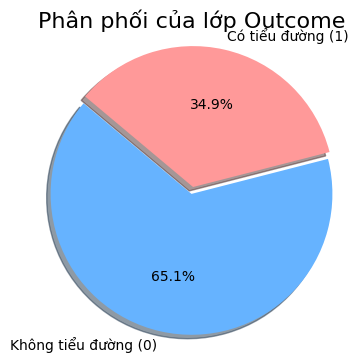

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Tính toán số lượng cho mỗi lớp trong cột 'Outcome'
outcome_counts = df_dataset['Outcome'].value_counts()

# 2. Chuẩn bị nhãn và màu sắc cho biểu đồ
labels = ['Không tiểu đường (0)', 'Có tiểu đường (1)']
colors = ['#66b3ff', '#ff9999'] # Xanh và đỏ nhạt
explode = (0.05, 0)  # Tách nhẹ lát đầu tiên ra khỏi tâm

# 3. Vẽ biểu đồ tròn
plt.figure(figsize=(4, 4)) # Tạo một khung hình vuông
plt.pie(
    outcome_counts,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',  # Hiển thị phần trăm với 1 chữ số thập phân
    startangle=140,      # Xoay biểu đồ để góc nhìn đẹp hơn
    explode=explode,     # Áp dụng hiệu ứng tách
    shadow=True          # Thêm bóng để có hiệu ứng 3D nhẹ
)

# 4. Thêm tiêu đề và đảm bảo biểu đồ là hình tròn
plt.title('Phân phối của lớp Outcome', fontsize=16)
plt.axis('equal')  # Đảm bảo biểu đồ tròn, không bị méo

# 5. Hiển thị biểu đồ
plt.show()

#### (5) Mối tương quan giữa các tính chất (Correlations)

Sự tương quan (correlation) đề cập đến mối quan hệ giữa hai biến và cách chúng có thể có hoặc không cùng nhau thay đổi.

Phương pháp phổ biến nhất để tính toán tương quan là Pearson's Correlation Coeficient, giả định có một phân phối chuẩn của các thuộc tính liên quan. Tương quan -1 hoặc 1 cho thấy mối tương quan âm hoặc dương đầy đủ tương ứng. Trong khi giá trị 0 hiển thị không tương quan ở tất cả. 

$$
r = \frac{\sum_{i=1}^n{\left(x_i - \hat{x}\right)\left(y_i - \hat{y}\right)}}{\sqrt{\sum_{i=1}^n{\left(x_i - \hat{x}\right)^2}\sum_{i=1}^n{\left(y_i - \hat{y}\right)^2}}}
$$

Một số thuật toán học máy như hồi quy tuyến tính và logistic có hiệu suất kém nếu có các thuộc tính tương quan cao trong tập dữ liệu của bạn. 

Như vậy, thật sự cần thiết để xem xét tất cả các mối tương quan theo cặp của các thuộc tính trong tập dữ liệu.


Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

[Text(0, 0, 'Pregnancies'),
 Text(0, 1, 'Glucose'),
 Text(0, 2, 'BloodPressure'),
 Text(0, 3, 'SkinThickness'),
 Text(0, 4, 'Insulin'),
 Text(0, 5, 'BMI'),
 Text(0, 6, 'DiabetesPedigreeFunction'),
 Text(0, 7, 'Age')]

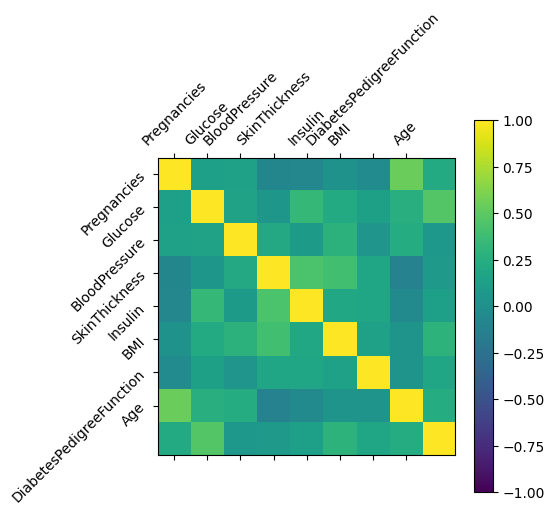

In [30]:
correlations = df_dataset.corr(method='pearson')
display.display(correlations)
plt.matshow(correlations, vmin=-1, vmax=1), plt.colorbar()
plt.xticks(np.arange(0, len(df_dataset.columns)-1), rotation=45)
plt.yticks(np.arange(0, len(df_dataset.columns)-1), rotation=45)
plt.gca().set_xticklabels(list(df_dataset.columns[:-1]))
plt.gca().set_yticklabels(list(df_dataset.columns[:-1]))


### 3.2. Hiển thị dữ liệu (Visualize Data)


**Box and whisker plots**


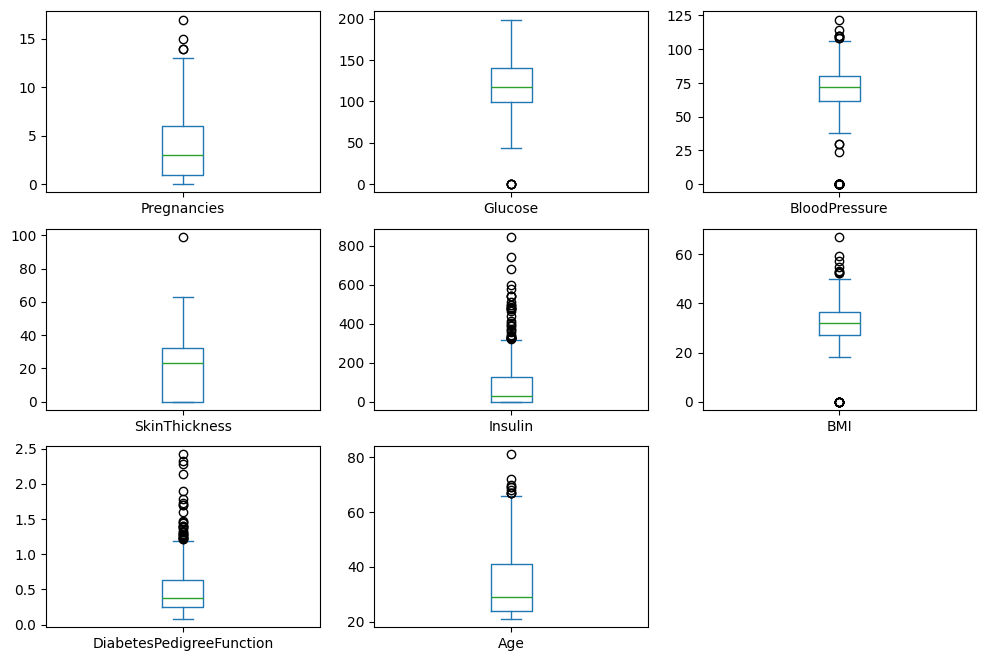

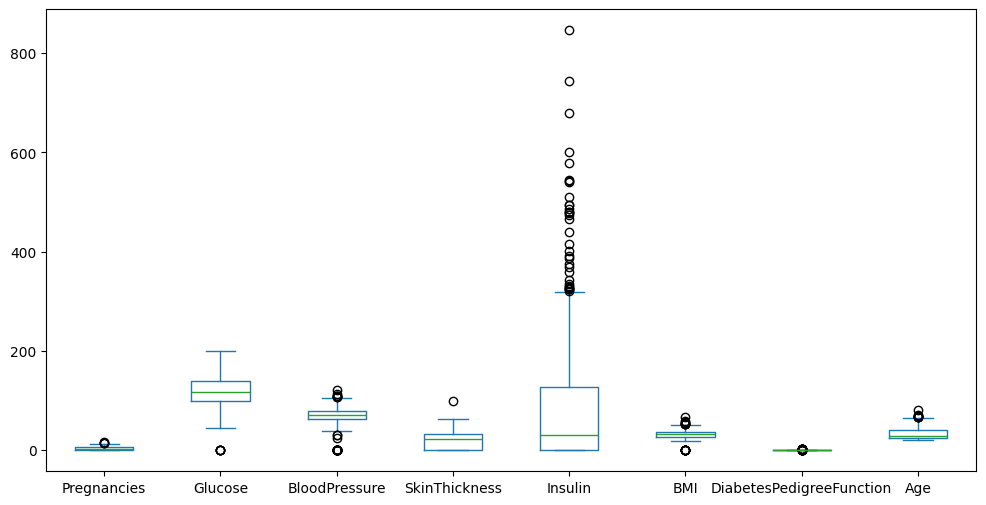

In [ ]:
df_dataset.drop(columns=["Outcome"]).plot(kind="box", subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(12,8));
df_dataset.drop(columns=["Outcome"]).plot(kind="box", figsize=(12,6));

**Biểu đồ Histogram**


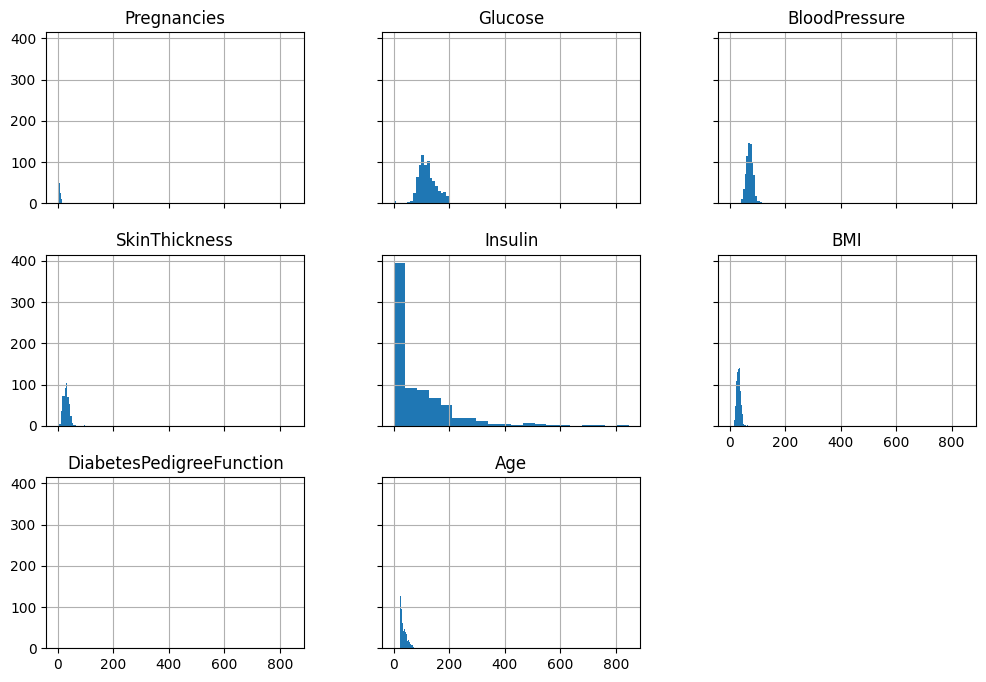

In [32]:
df_dataset.drop(columns=["Outcome"]).hist(figsize=(12, 8), bins = 20, sharex = True, sharey = True);


#### (2) Hiển thị nhiều tính chất (Multivariate Plots)

+ Các cặp tính chất có thể tương quan với nhau ở những mức độ khác nhau, cần quan sát để lựa chọn đặc trưng phù hợp.


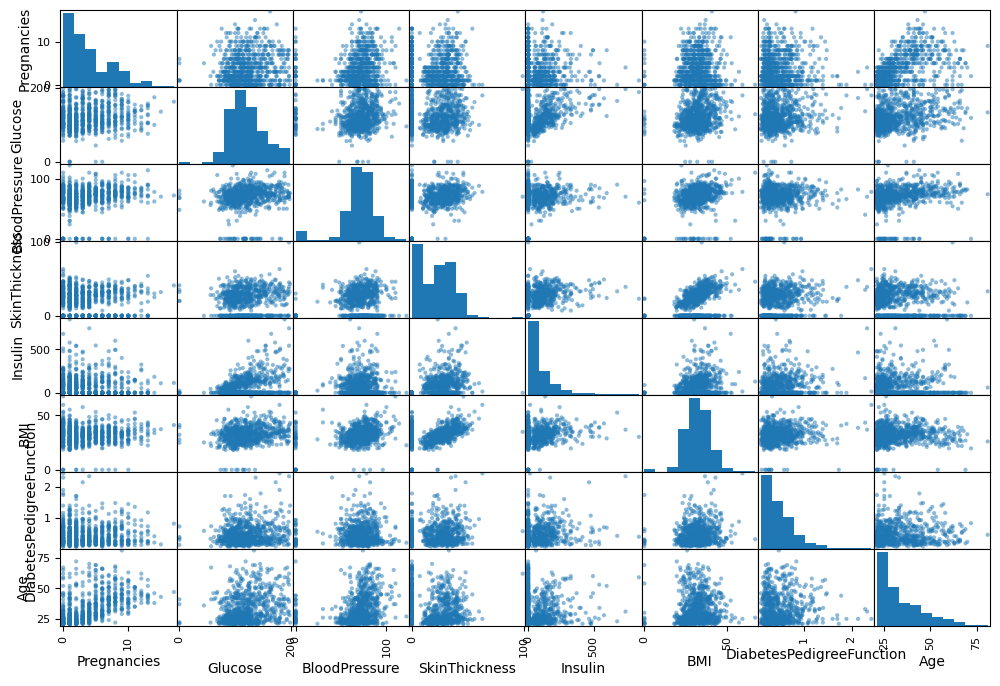

In [ ]:
pd.plotting.scatter_matrix(df_dataset.drop(columns=["Outcome"]), figsize=(12,8));

## 4. Chuẩn bị dữ liệu (Prepare Data)


### 4.1. Làm sạch dữ liệu (Data Cleaning)


#### (1) Tạo bảng dữ liệu làm sạch (giữ Input, Output)


In [ ]:
df_clean = df_dataset.copy()
df_clean

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

#### (2) Xử lý giá trị bất hợp lệ và trùng lặp


In [35]:
# In Pima, some zeros are invalid and indicate missing values
zero_as_missing_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
print({c: (df_clean[c] == 0).sum() for c in zero_as_missing_cols})

# Replace zeros with NaN for these columns
for col in zero_as_missing_cols:
    df_clean[col] = df_clean[col].replace(0, np.nan)

# Show rows with any NaN
has_nan_after = df_clean.isna().any().any()
print(f"+ Any NaN after zero replacement: {has_nan_after}")
if has_nan_after:
    display.display(df_clean[df_clean.isna().any(axis=1)].head())

# Impute NaN by median per column
for col in zero_as_missing_cols:
    median_val = df_clean[col].median()
    df_clean[col].fillna(median_val, inplace=True)

# Drop duplicated rows
n_dup_before = df_clean.duplicated().sum()
df_clean.drop_duplicates(ignore_index=True, inplace=True)
print(f"+ Duplicates before: {n_dup_before}, after drop: {df_clean.duplicated().sum()}")

df_clean.head()


{'Glucose': np.int64(5), 'BloodPressure': np.int64(35), 'SkinThickness': np.int64(227), 'Insulin': np.int64(374), 'BMI': np.int64(11)}
+ Any NaN after zero replacement: True


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
5            5    116.0           74.0            NaN      NaN  25.6   
7           10    115.0            NaN            NaN      NaN  35.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
5                     0.201   30        0  
7                     0.134   29        0

+ Duplicates before: 0, after drop: 0


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### 4.2. Biến đổi dữ liệu (Data Transforms)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán


Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.081770   
Glucose                      0.128213  1.000000       0.218937       0.192615   
BloodPressure                0.208615  0.218937       1.000000       0.191892   
SkinThickness                0.081770  0.192615       0.191892       1.000000   
Insulin                      0.025047  0.419451       0.045363       0.155610   
BMI                          0.021559  0.231049       0.281257       0.543205   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.102188   
Age                          0.544341  0.266909       0.324915       0.126107   
Outcome                      0.221898  0.492782       0.165723       0.214873   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.025047  0.021559                 -0.033523   
Glucose                   0.419451  0.231049                  0.137327   
BloodPressure             0.045363  0.281257                 -0.002378   
SkinThickness             0.155610  0.543205                  0.102188   
Insulin                   1.000000  0.180241                  0.126503   
BMI                       0.180241  1.000000                  0.153438   
DiabetesPedigreeFunction  0.126503  0.153438                  1.000000   
Age                       0.097101  0.025597                  0.033561   
Outcome                   0.203790  0.312038                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.266909  0.492782  
BloodPressure             0.324915  0.165723  
SkinThickness             0.126107  0.214873  
Insulin                   0.097101  0.203790  
BMI                       0.025597  0.312038  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

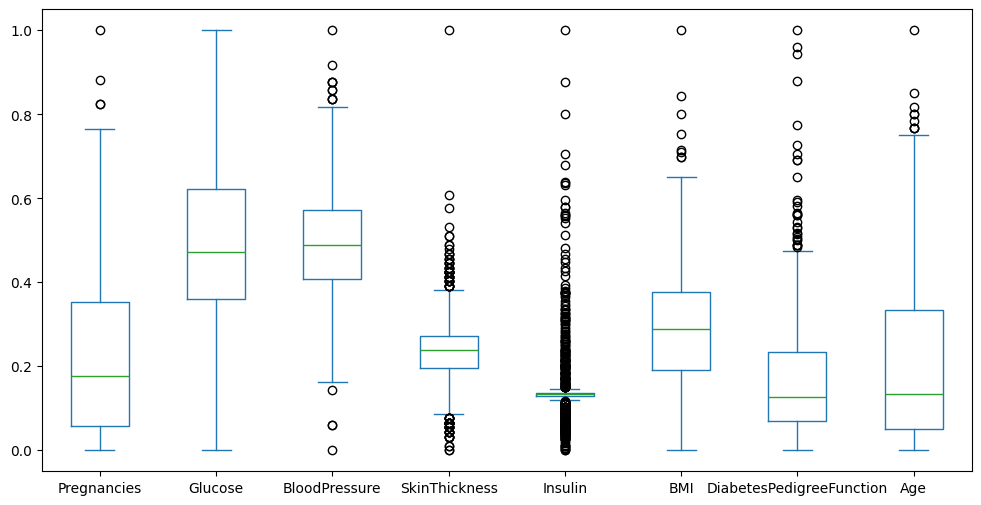

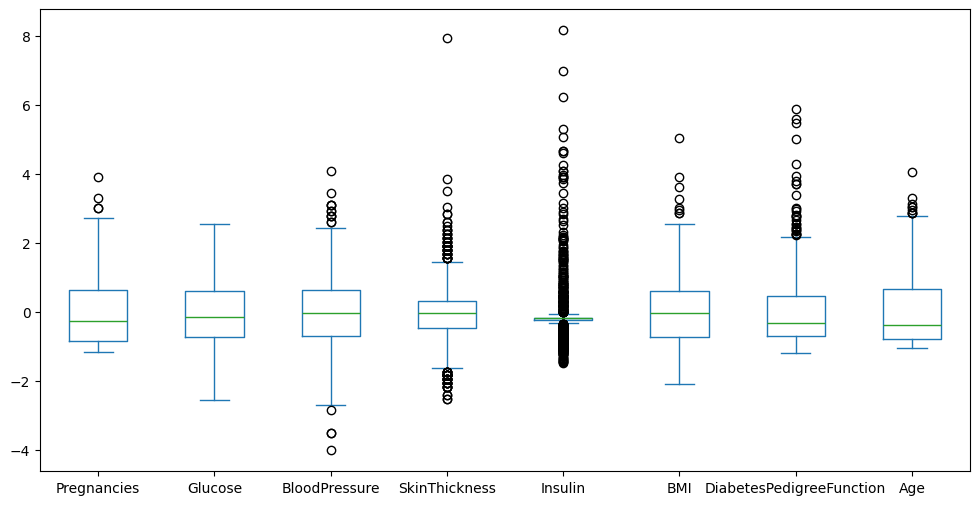

In [36]:
scale_columns = [
    "Pregnancies","Glucose","BloodPressure","SkinThickness",
    "Insulin","BMI","DiabetesPedigreeFunction","Age"
]

# Min-Max Normalization
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_clean[scale_columns])
df_clean_minmax = df_clean.copy()
df_clean_minmax[scale_columns] = minmax_scaler.transform(df_clean[scale_columns])
df_clean_minmax[scale_columns].plot(kind="box", figsize=(12,6));

# Standard Normalization
standard_scaler = StandardScaler()
standard_scaler.fit(df_clean[scale_columns])
df_clean_standard = df_clean.copy()
df_clean_standard[scale_columns] = standard_scaler.transform(df_clean[scale_columns])
df_clean_standard[scale_columns].plot(kind="box", figsize=(12,6));

# Correlations after scaling (should preserve relationships)
correlations_std = df_clean_standard.corr(method='pearson')
display.display(correlations_std)


#### (3) Chia dữ liệu thực nghiệm


In [37]:
X_data, y_data = df_clean.values[:, :-1], df_clean.values[:, -1]
print(X_data[:5])
print(y_data[:5])

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7, random_state=42, stratify=y_data)
print(f'+ Train/Test: Train Ratio = {len(X_train)/len(X_data):.2f}')
print(f'+ Train: shape={X_train.shape}')
print(f'+ Test: shape={X_test.shape}')


[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 1.250e+02 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 1.250e+02 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 2.900e+01 1.250e+02 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]
[1. 0. 1. 0. 1.]
+ Train/Test: Train Ratio = 0.70
+ Train: shape=(537, 8)
+ Test: shape=(231, 8)


#### (4) Lưu thông tin phục vụ thực nghiệm


In [38]:
save_dir = "exps/pima"
if os.path.exists(save_dir) == False: os.makedirs(save_dir)

# Save training data
np.savez(f'{save_dir}/data.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

# Save cleaning data (prefer Excel, fallback to CSV if Excel engine missing)
try:
    with pd.ExcelWriter(f'{save_dir}/df_clean.xlsx', engine='xlsxwriter') as writer:
        df_clean.to_excel(writer, index=False)
    saved_clean_path = f'{save_dir}/df_clean.xlsx'
except ModuleNotFoundError:
    df_clean.to_csv(f'{save_dir}/df_clean.csv', index=False)
    saved_clean_path = f'{save_dir}/df_clean.csv'

# Save scalers
joblib.dump(minmax_scaler, f'{save_dir}/minmax_scaler.joblib')
joblib.dump(standard_scaler, f'{save_dir}/standard_scaler.joblib')

print("Saved:", os.listdir(save_dir))
print("Clean data saved to:", saved_clean_path)


Saved: ['data.npz', 'df_clean.csv', 'imgs', 'minmax_scaler.joblib', 'standard_scaler.joblib']
Clean data saved to: exps/pima/df_clean.csv


#### (5) Kiểm tra phục hồi dữ liệu


In [39]:
loaded = dict(np.load(f'{save_dir}/data.npz'))
print(loaded.keys())

# Load clean data depending on what was saved
clean_df = None
xlsx_path = f'{save_dir}/df_clean.xlsx'
csv_path = f'{save_dir}/df_clean.csv'
if os.path.exists(xlsx_path):
    clean_df = pd.read_excel(xlsx_path)
elif os.path.exists(csv_path):
    clean_df = pd.read_csv(csv_path)

display.display(clean_df.head())

joblib.load(f'{save_dir}/minmax_scaler.joblib')
joblib.load(f'{save_dir}/standard_scaler.joblib')


dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

StandardScaler()

#### (6) Ghi chú về dữ liệu danh mục (Category)

Trong bộ Pima, tất cả cột đầu vào đều là số; không cần LabelEncoder/OneHot như bài Iris. Mục tiêu `Outcome` là nhị phân 0/1.


# Kết thúc
